In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset imports, etc.

The dataset is imported, the columns are defined, etc.

In [0]:
df = pd.read_csv('/content/drive/My Drive/Deep Blue/Data/Wardwise Data/CSV Data Files/AWard.csv', header = None)

In [59]:
df.head()

,0,1,2,3,4,5,6
0,01-2014,4340,189442.6588,22815.36166,166627.2971,70470684.13,2016605.606
1,02-2014,4341,189603.7736,22834.76539,166769.0082,70230002.77,2010666.796
2,03-2014,4341,189764.8884,22854.16911,166910.7193,70591024.82,2022544.417
3,04-2014,4342,189926.0033,22873.57284,167052.4304,70831706.18,2034422.037
4,05-2014,4342,190087.1181,22892.97656,167194.1415,71313068.92,2046299.657


In [0]:
cols = ['Year','Connections','TotalPop','Slum','NonSlum','Demand','Consumption']

In [61]:
df.columns = cols
df.shape

(60, 7)

In [62]:
df.head()

,Year,Connections,TotalPop,Slum,NonSlum,Demand,Consumption
0,01-2014,4340,189442.6588,22815.36166,166627.2971,70470684.13,2016605.606
1,02-2014,4341,189603.7736,22834.76539,166769.0082,70230002.77,2010666.796
2,03-2014,4341,189764.8884,22854.16911,166910.7193,70591024.82,2022544.417
3,04-2014,4342,189926.0033,22873.57284,167052.4304,70831706.18,2034422.037
4,05-2014,4342,190087.1181,22892.97656,167194.1415,71313068.92,2046299.657


# Encoding the categorical data into numerical format

The year and month which are categorical variables are encoded to numerical format

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Year'].astype(str))
df['Year'] = le.transform(df['Year'].astype(str))

# Data visualization

Data is plotted with each of the variables

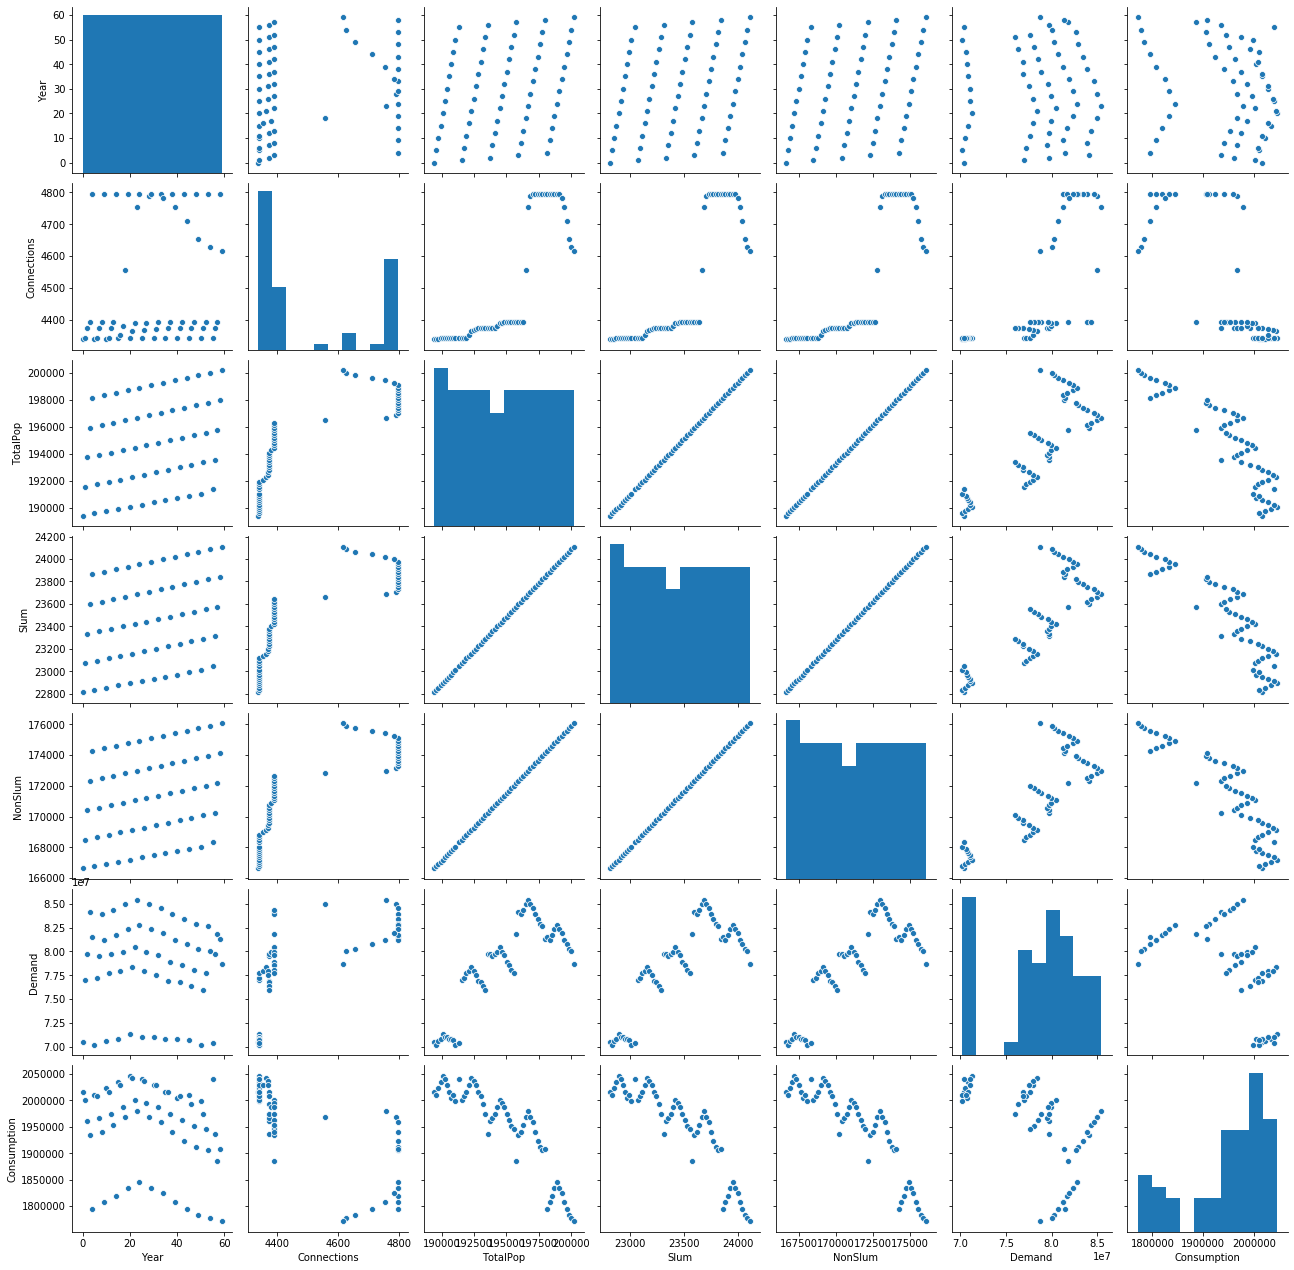

In [65]:
sns.pairplot(df[cols], height=2.5)
plt.show()

# Scaling the variables

Feature scaling of the variables into a range

# Correlation algorithms for feature selection

The correlation matrix and the heat map are plotted

In [66]:
df.corr()

,Year,Connections,TotalPop,Slum,NonSlum,Demand,Consumption
Year,1.000000,0.178925,0.275378,0.275378,0.275378,-0.009094,-0.229647
Connections,0.178925,1.000000,0.834074,0.834074,0.834074,0.662277,-0.749375
TotalPop,0.275378,0.834074,1.000000,1.000000,1.000000,0.819655,-0.890392
Slum,0.275378,0.834074,1.000000,1.000000,1.000000,0.819655,-0.890392
NonSlum,0.275378,0.834074,1.000000,1.000000,1.000000,0.819655,-0.890392
Demand,-0.009094,0.662277,0.819655,0.819655,0.819655,1.000000,-0.548843
Consumption,-0.229647,-0.749375,-0.890392,-0.890392,-0.890392,-0.548843,1.000000


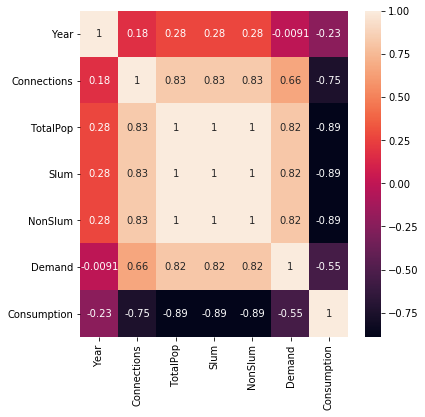

In [67]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Features are selected to eliminate strong multicolinearity

In [0]:
X = df[['Year','Connections','TotalPop']]
Y = df[['Demand']]

In [0]:
import statsmodels.api as sm
import statsmodels.formula.api as snf

In [70]:
X_const = sm.add_constant(X)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Fitting the model for initial observations

In [0]:
model = sm.OLS(Y, X_const)

In [0]:
lr = model.fit()

In [73]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Demand   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     51.88
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           3.55e-16
Time:                        07:30:08   Log-Likelihood:                -965.15
No. Observations:                  60   AIC:                             1938.
Df Residuals:                      56   BIC:                             1947.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.824e+08   2.55e+07     -7.147      0.000   -2.33e+08   -1.31e+08
Year        -6.847e+04   1.89e+04     -3.624      0.001   -1.06e+05   -3.06e+04
Connections -2731.4824   3008.367     -0.908      0.368   -8757.965    3295.000
TotalPop     1413.2351    183.602      7.697      0.000    1045.437    1781.033
==============================================================================
Omnibus:                        5.147   Durbin-Watson:                   0.258
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                2.162
Skew:                          -0.010   Prob(JB):                        0.339
Kurtosis:                       2.070   Cond. No.                     1.59e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Multicolinearity solution with VIF

In [74]:
# Imports
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(X.columns, vif)
vif["features"] = X.columns

Index(['Year', 'Connections', 'TotalPop'], dtype='object')     VIF Factor
0     3.987959
1  1129.759913
2  1122.893040


# Training and testing the data

Splitting the dataset into training and testing data, fitting the model and generating predictinons

In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from numpy import *
from sklearn.metrics import r2_score

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
reg = LinearRegression()
reg.fit(X_train, Y_train)
print(reg.intercept_)
print(reg.coef_)

[-1.92245463e+08]
[[-45591.51588273  -5125.4570569    1517.13668276]]


R2 Score as a metric of accuracy

In [77]:
linear_reg = snf.ols(formula = 'Y ~ Connections + Year + Slum + NonSlum', data = df)
benchmark = linear_reg.fit()
r2_score(Y,benchmark.predict(df))

0.7355401993965971

In [0]:
Y_pred = reg.predict(X_test)

In [79]:
df1 = pd.DataFrame({'Actual': Y_test.values.flatten(), 'Predicted': Y_pred.flatten()})
df2 = df1.head()
print(df2)

        Actual     Predicted
0  79733234.37  7.927178e+07
1  81779025.98  7.961662e+07
2  78702861.91  8.512169e+07
3  80455278.46  7.928691e+07
4  70434581.93  7.333587e+07


# Visualization of predictions

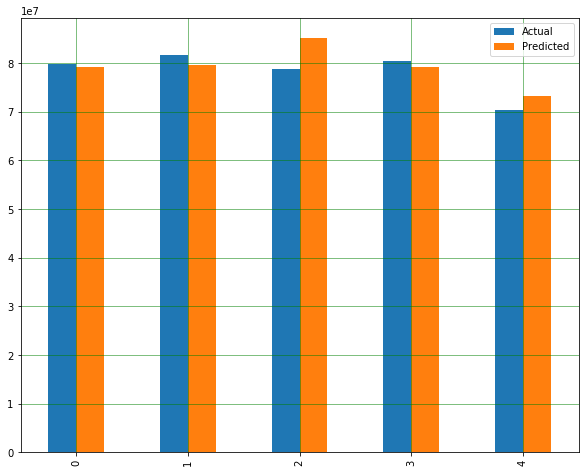

In [80]:
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [0]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns